<h2>Задание 1</h2

<h3>1.1</h3>

In [1]:
#pip install ucimlrepo

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import scipy.stats as scs

In [3]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 


# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [4]:
data = wine_quality.data.original
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
data_red = data[data["color"] == "red"].drop(columns = ["color"])
data_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data_white = data[data["color"] == "white"].drop(columns = ["color"])
data_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
data_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [9]:
data_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1599 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [56]:
print(f"duplicates in red wine: {len(data_red)- len(data_red.drop_duplicates())}")
print(f"duplicates in white wine: {len(data_white)- len(data_white.drop_duplicates())}")
print(f"all duplicates: {len(data)- len(data.drop_duplicates())}")

duplicates in red wine: 240
duplicates in white wine: 937
all duplicates: 1177


<h3>1.2</h3>

In [40]:
def visualization(data):
    data.hist(figsize = (14, 10))
    data = data.drop(columns = ["quality"])

    fig, axs = plt.subplots(nrows = 4 , ncols = 3, figsize = (14, 14))
    i = 0
    for column in data:
        axs[i % 4, i % 3].set_title(column)
        axs[i % 4, i % 3].boxplot(data[column])
        i += 1
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot = True, fmt='.1g')

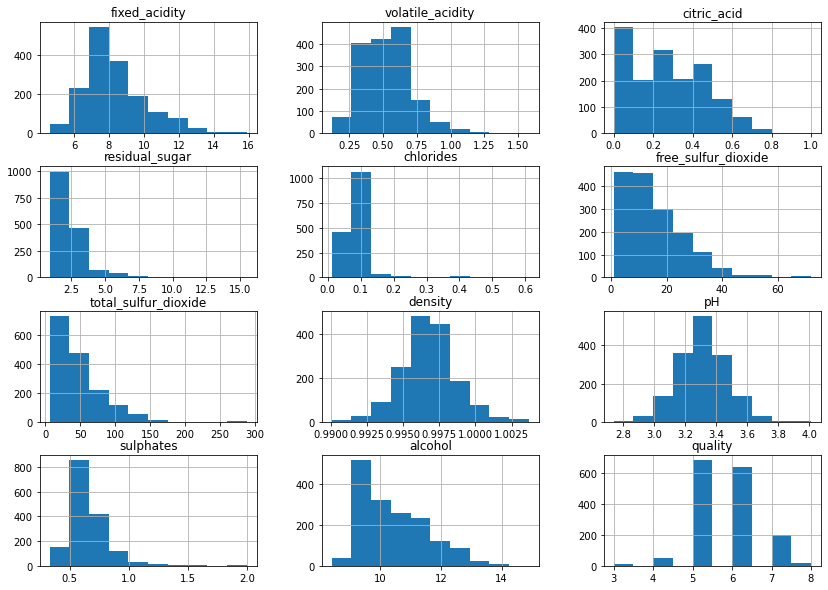

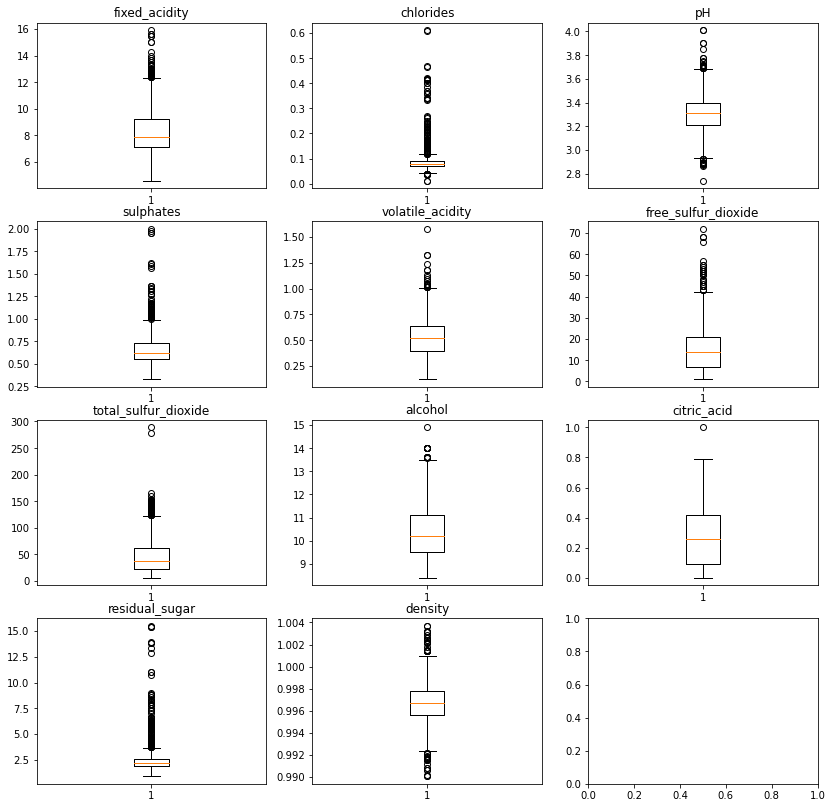

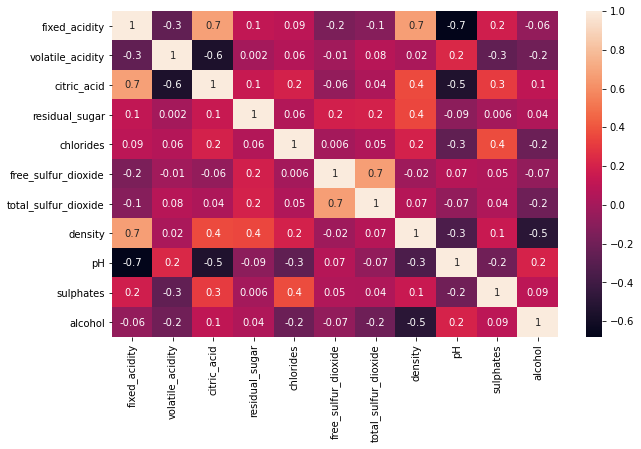

In [41]:
visualization(data_red)

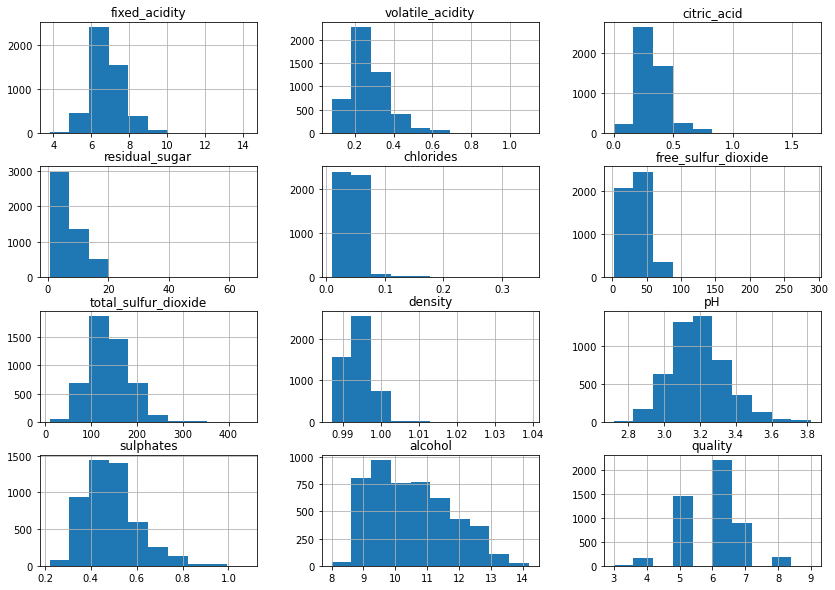

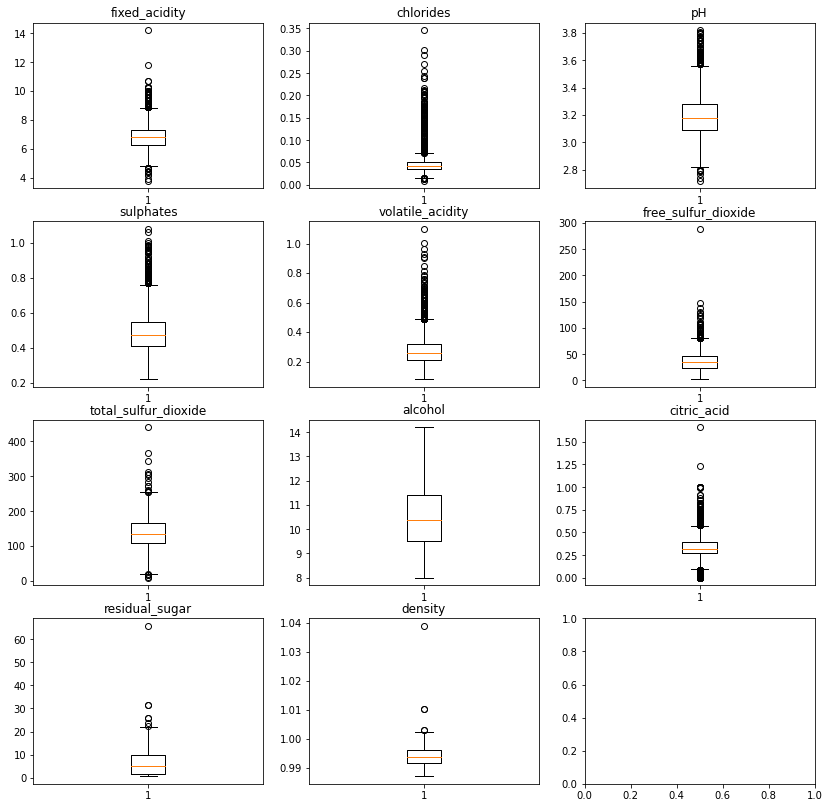

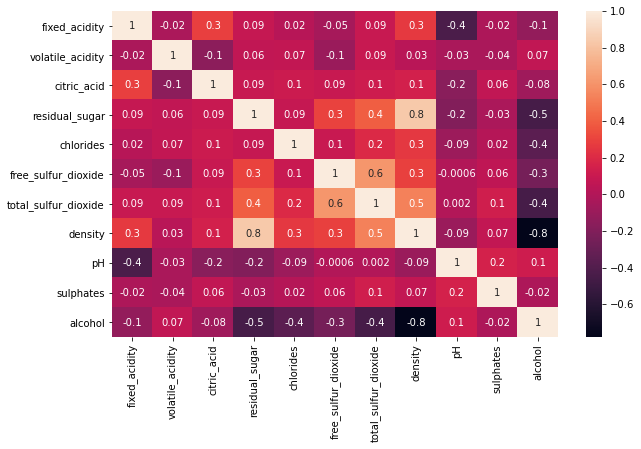

In [42]:
visualization(data_white)

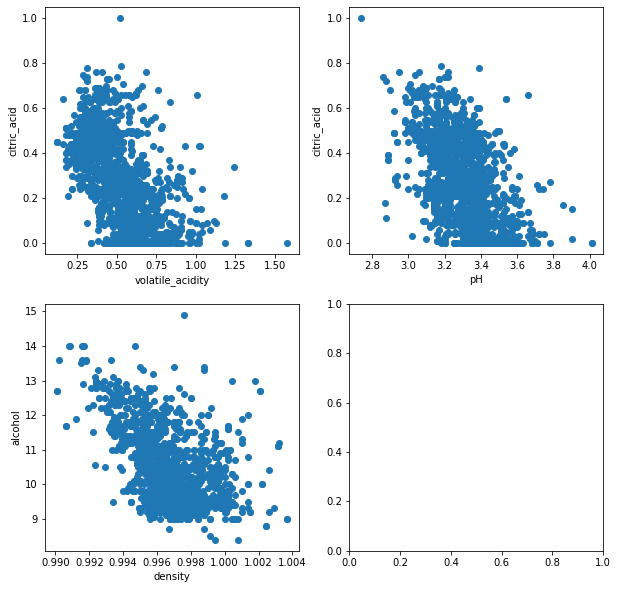

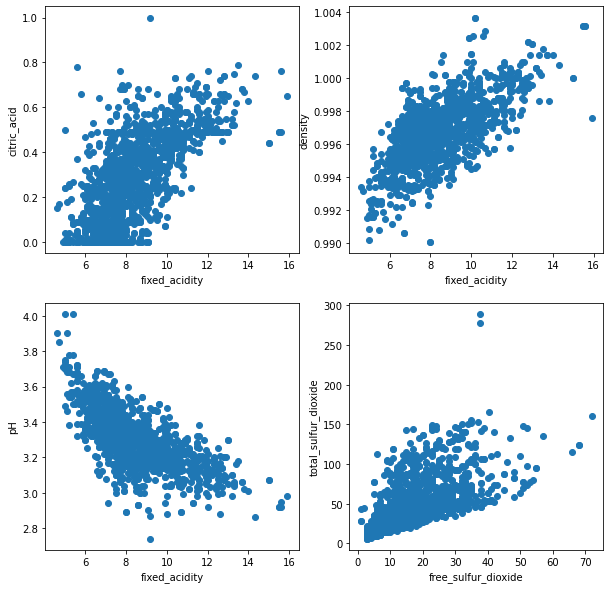

In [100]:
# для красного вина
def visual_red_scatter(data):
    fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (10, 10))    
    axs[0, 0].set_xlabel("volatile_acidity")
    axs[0, 0].set_ylabel("citric_acid")
    axs[0, 0].scatter(data["volatile_acidity"], data["citric_acid"])

    axs[0, 1].set_xlabel("pH")
    axs[0, 1].set_ylabel("citric_acid")
    axs[0, 1].scatter(data["pH"], data["citric_acid"])

    axs[1, 0].set_xlabel("density")
    axs[1, 0].set_ylabel("alcohol")
    axs[1, 0].scatter(data["density"], data["alcohol"])

    fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (10, 10))    
    axs[0, 0].set_xlabel("fixed_acidity")
    axs[0, 0].set_ylabel("citric_acid")
    axs[0, 0].scatter(data["fixed_acidity"], data["citric_acid"])

    axs[0, 1].set_xlabel("fixed_acidity")
    axs[0, 1].set_ylabel("density")
    axs[0, 1].scatter(data["fixed_acidity"], data["density"])

    axs[1, 0].set_xlabel("fixed_acidity")
    axs[1, 0].set_ylabel("pH")
    axs[1, 0].scatter(data["fixed_acidity"], data["pH"])

    axs[1, 1].set_xlabel("free_sulfur_dioxide")
    axs[1, 1].set_ylabel("total_sulfur_dioxide")
    axs[1, 1].scatter(data["free_sulfur_dioxide"], data["total_sulfur_dioxide"])

visual_red_scatter(data_red)

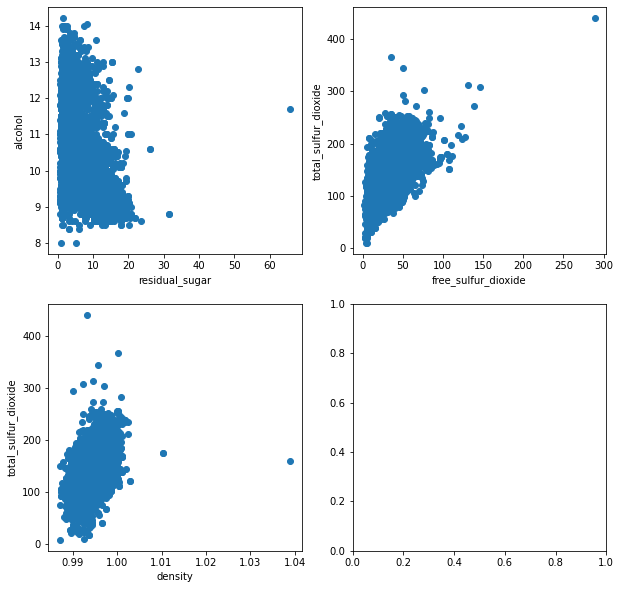

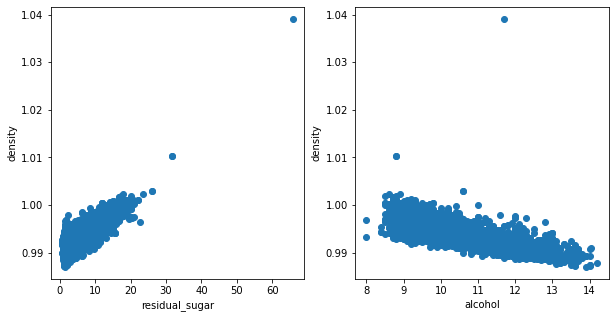

In [101]:
# для белого вина
def visual_white_scatter(data):
    fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (10, 10))    
    axs[0, 0].set_xlabel("residual_sugar")
    axs[0, 0].set_ylabel("alcohol")
    axs[0, 0].scatter(data["residual_sugar"], data["alcohol"])

    axs[0, 1].set_xlabel("free_sulfur_dioxide")
    axs[0, 1].set_ylabel("total_sulfur_dioxide")
    axs[0, 1].scatter(data["free_sulfur_dioxide"], data["total_sulfur_dioxide"])

    axs[1, 0].set_xlabel("density")
    axs[1, 0].set_ylabel("total_sulfur_dioxide")
    axs[1, 0].scatter(data["density"], data["total_sulfur_dioxide"])

    fig, axs = plt.subplots(ncols = 2, figsize = (10, 5))    
    axs[0].set_xlabel("residual_sugar")
    axs[0].set_ylabel("density")
    axs[0].scatter(data["residual_sugar"], data["density"])

    axs[1].set_xlabel("alcohol")
    axs[1].set_ylabel("density")
    axs[1].scatter(data["alcohol"], data["density"])

visual_white_scatter(data_white)

<h2>Задание 2</h2>

<h3>2.1</h3>

In [125]:
duplicateRows = data[data.duplicated()]
data2 = data.drop_duplicates()

data2_red = data2[data2["color"] == "red"].drop(columns = ["color"])
data2_white = data2[data2["color"] == "white"].drop(columns = ["color"])

print(f"number red wine: {data2_red.shape[0]}")
print(f"number white wine: {data2_white.shape[0]}")
print(f"number all wine: {data2.shape[0]}")

number red wine: 1359
number white wine: 3961
number all wine: 5320


In [154]:
def clean(data):
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = Q3 - Q1

    data_clean = data[~((data < (Q1 - 1.5* IQR)) | (data > (Q3 + 1.5 * IQR)) & (data["quality"] > 4) & (data["quality"] < 7)).any(axis=1)]
    return data_clean

In [156]:
data3_red = clean(data2_red)
data3_white = clean(data2_white)

In [157]:
print(f"clean number in red wine: {data3_red.shape[0]}")
print(f"clean number in white wine: {data3_white.shape[0]}")
print(f"clean number in all wine: {data3_red.shape[0] + data3_white.shape[0]}")
print("")
print(f"number deleted data in red wine: {data2_red.shape[0] - data3_red.shape[0]}")
print(f"number deleted data in white wine: {data2_white.shape[0] - data3_white.shape[0]}")
print(f"number deleted data in all wine: {data2_red.shape[0] + data2_white.shape[0] - data3_red.shape[0] - data3_white.shape[0]}")

clean number in red wine: 1319
clean number in white wine: 3849
clean number in all wine: 5168

number deleted data in red wine: 40
number deleted data in white wine: 112
number deleted data in all wine: 152


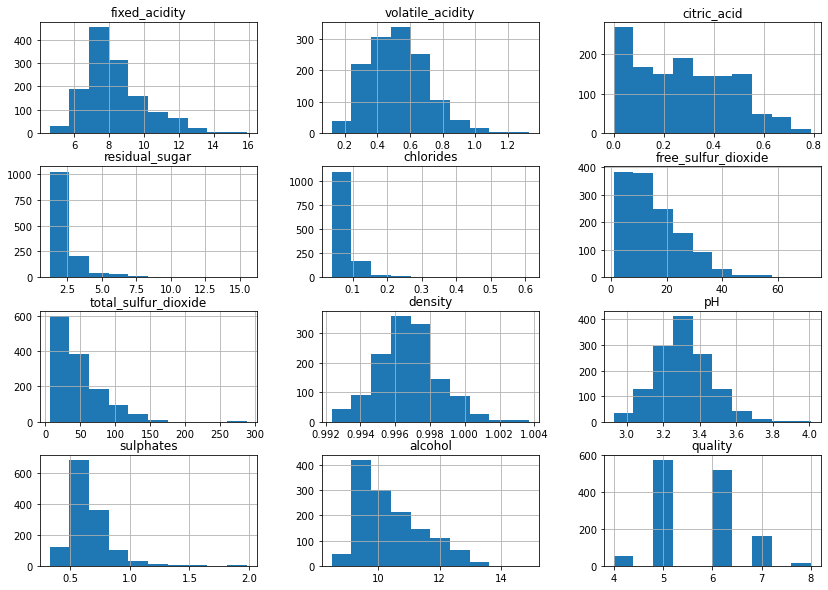

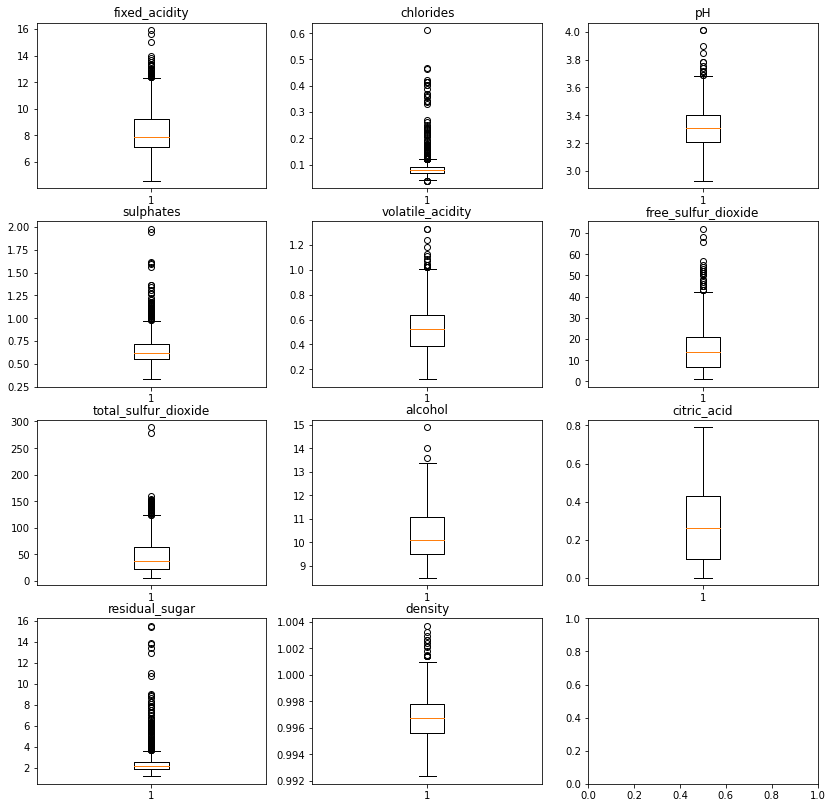

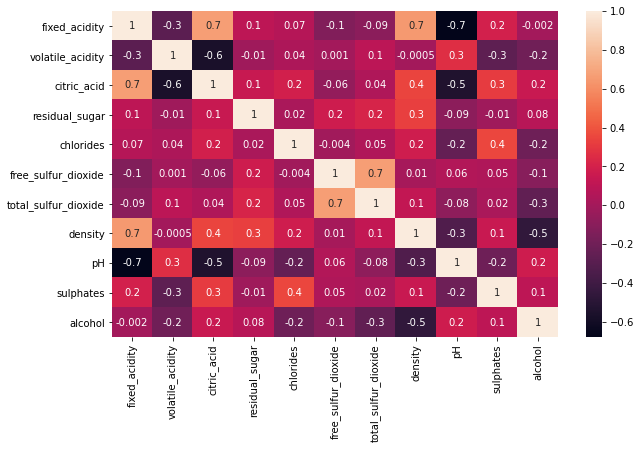

In [133]:
visualization(data3_red)

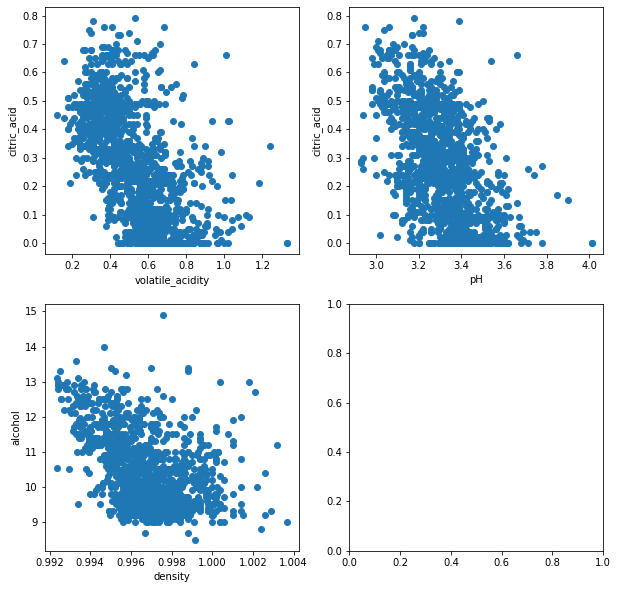

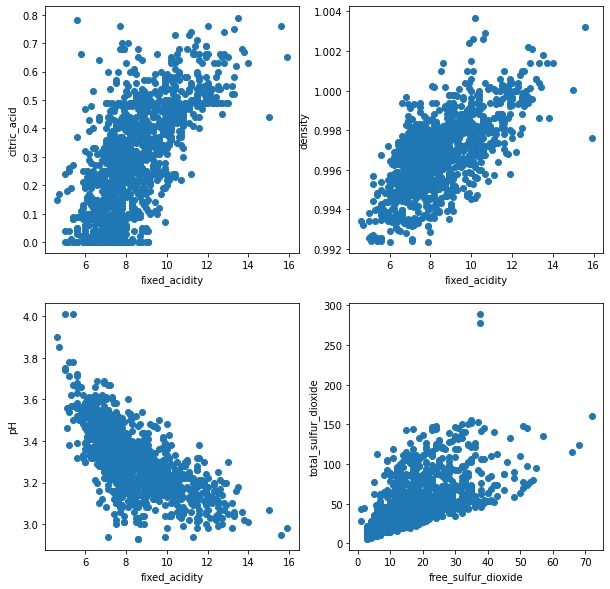

In [128]:
visual_red_scatter(data3_red)

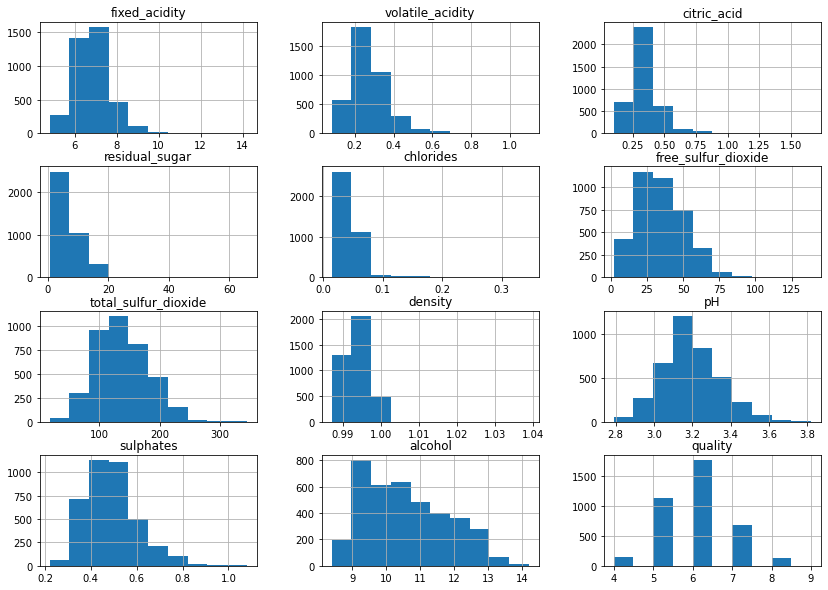

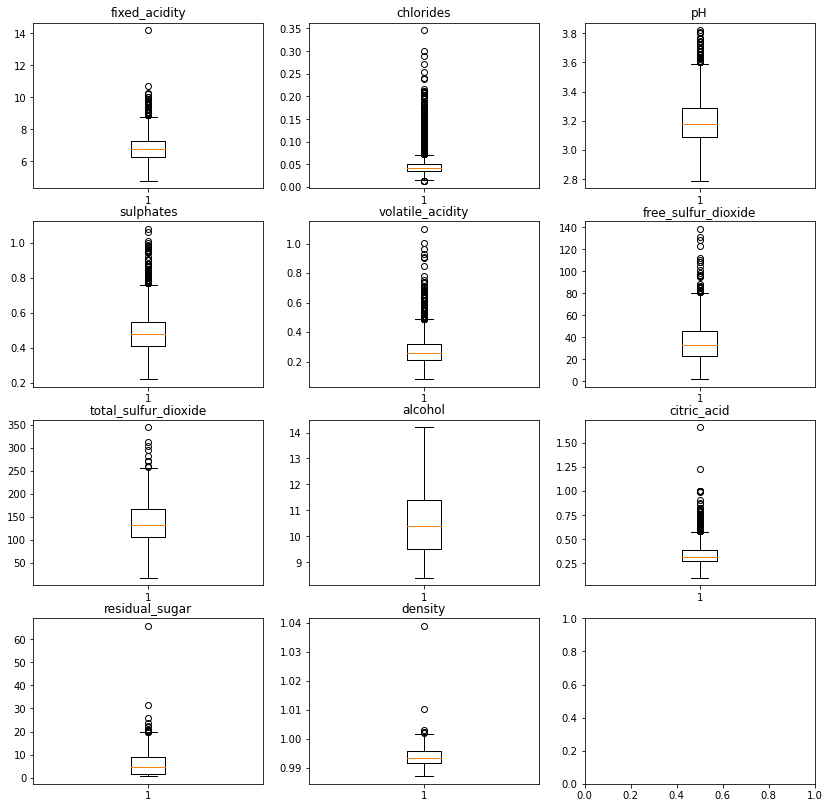

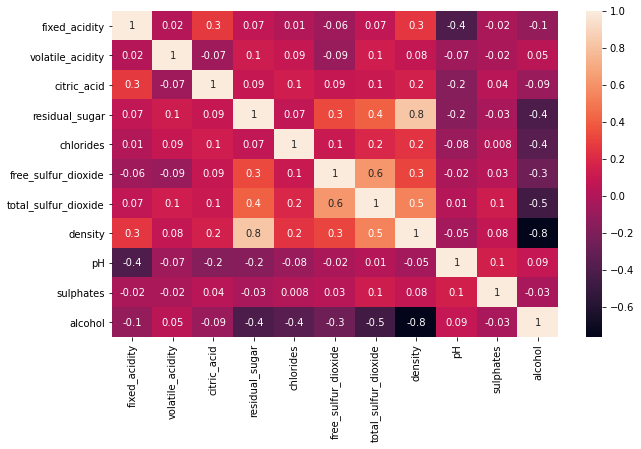

In [137]:
visualization(data3_white)

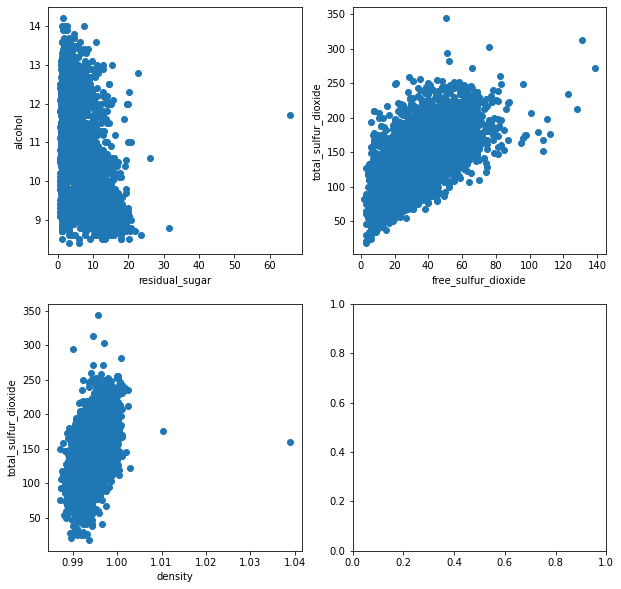

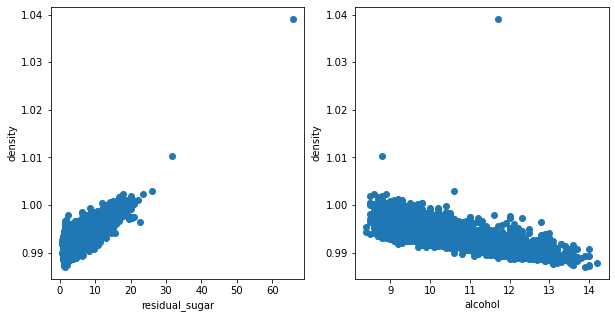

In [145]:
visual_white_scatter(data3_white)

<h3>2.2</h3>

In [169]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [185]:
def transform_data(data):    
    data_ph = data["pH"].to_numpy().reshape(-1, 1)
    data_quality = data["quality"].to_numpy()
    data_other = data.drop(columns = ["pH", "quality"])
    columns = [x for x in data_other]
    transformer = RobustScaler().fit(data_other)
    data_new = transformer.transform(data_other)
    data_new = pd.DataFrame(data_new, columns = columns)

    transformer_norm = StandardScaler().fit(data_ph)
    data_pH_norm = transformer_norm.transform(data_ph)
    data_new["pH"] = data_pH_norm
    data_new["quality"] = data_quality
    return data_new

In [186]:
data4_red = transform_data(data3_red)
data4_white = transform_data(data3_white)

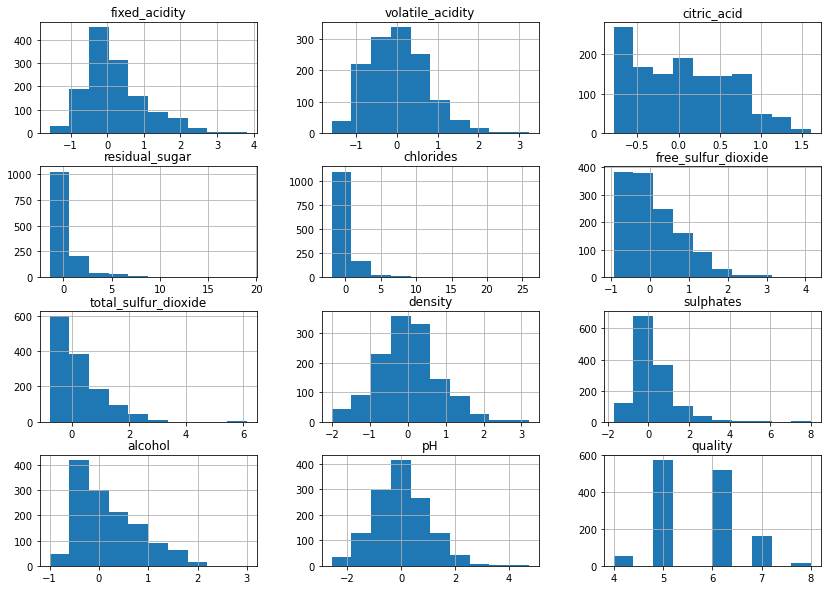

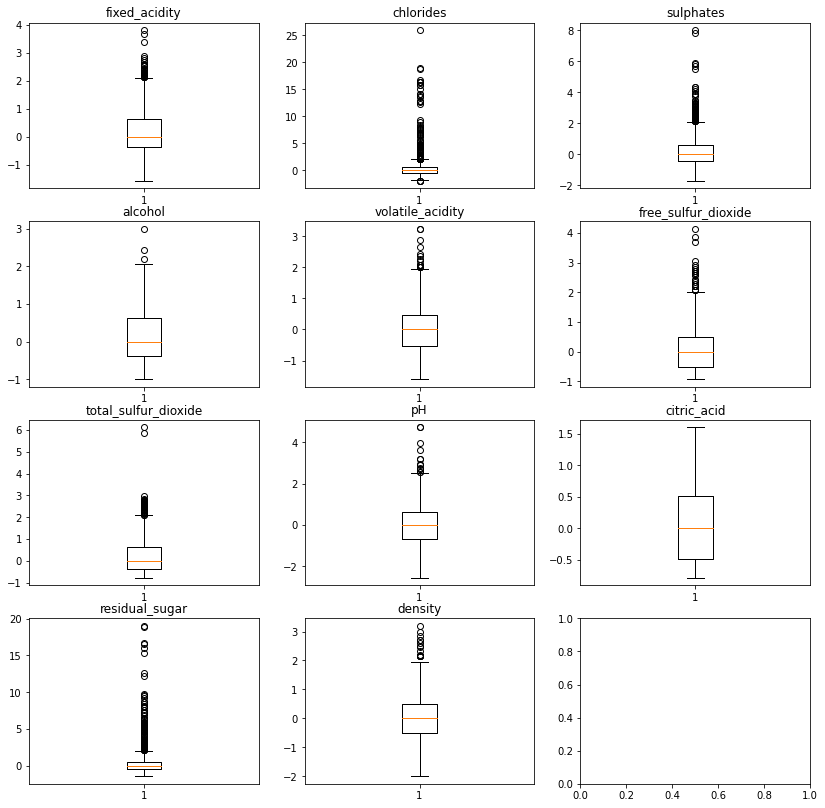

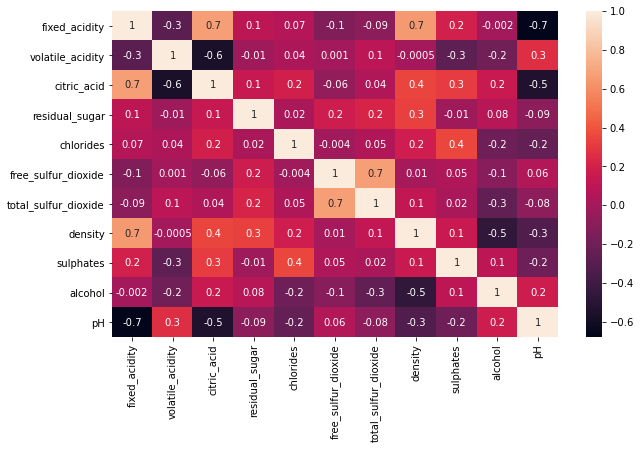

In [207]:
visualization(data4_red)

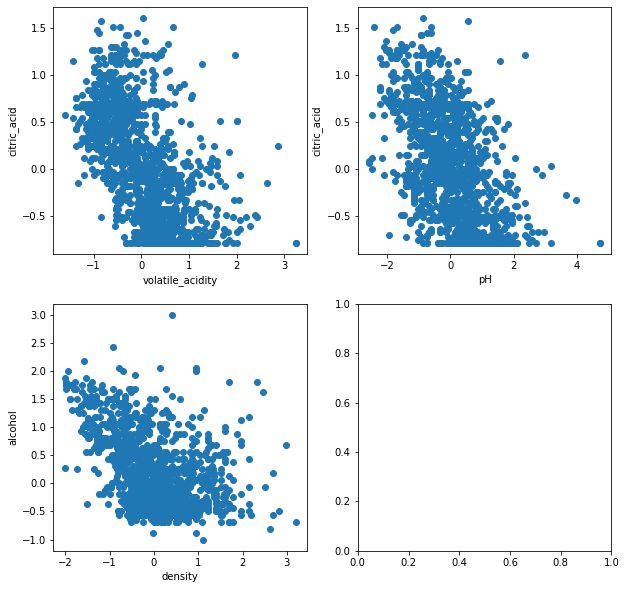

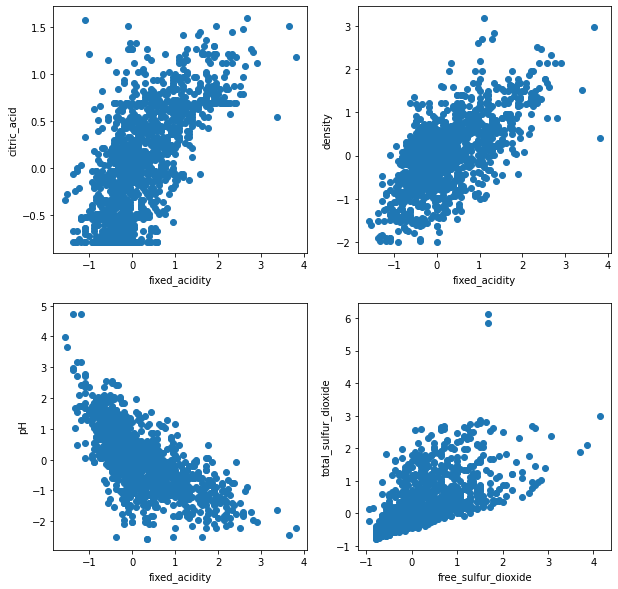

In [206]:
visual_red_scatter(data4_red)

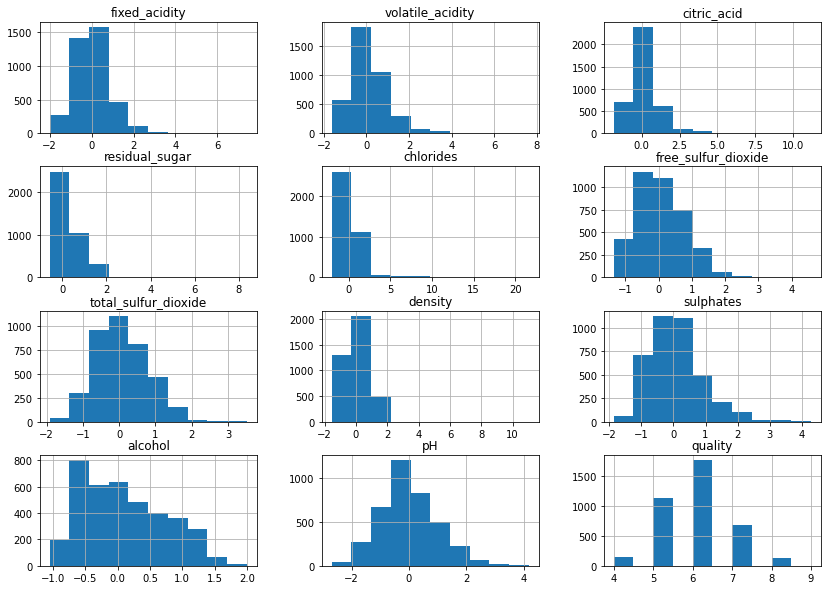

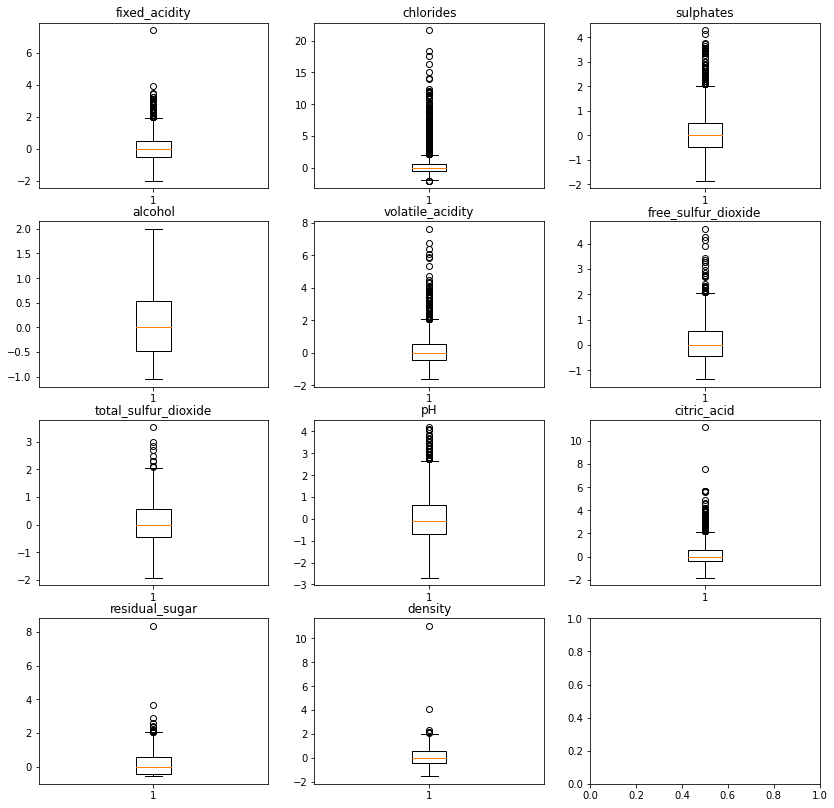

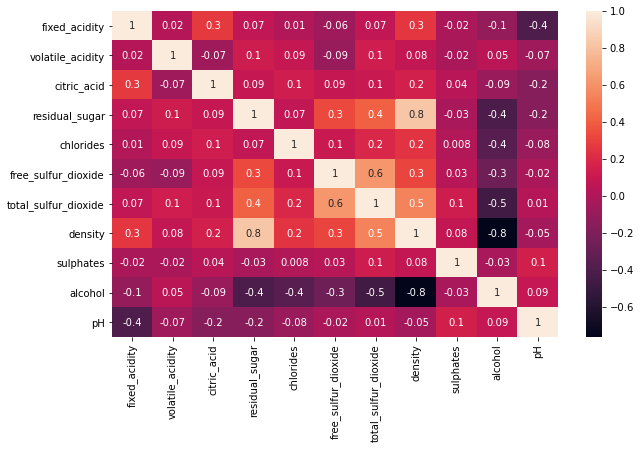

In [191]:
visualization(data4_white)

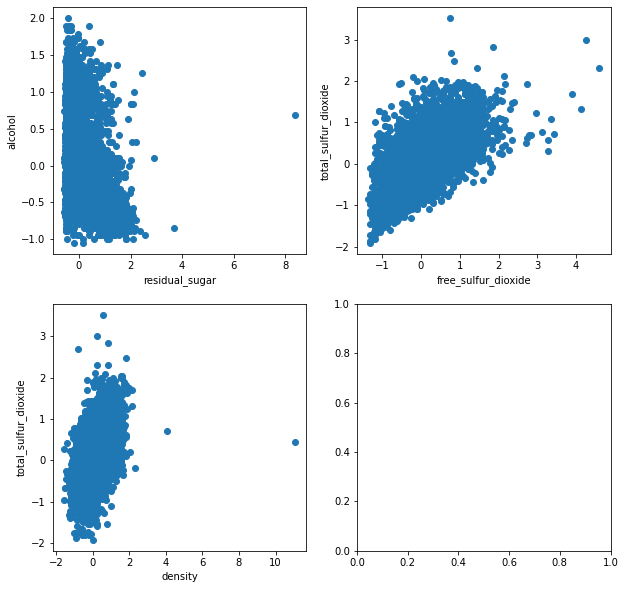

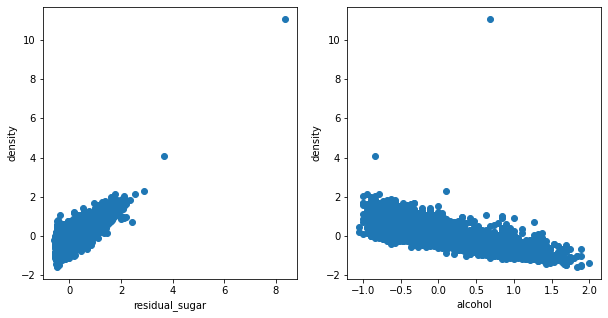

In [192]:
visual_white_scatter(data4_white)

In [193]:
from sklearn.feature_selection import mutual_info_classif

In [205]:
y = data4_red["quality"]
X = data4_red.drop(columns = ["quality"])
print([x for x in X])

mutual_info_classif(X, y)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol', 'pH']


array([0.0343795 , 0.09837389, 0.04850394, 0.00544676, 0.04890361,
       0.02691898, 0.04195342, 0.04162863, 0.08797708, 0.17201056,
       0.01134706])